## Airplane Passenger Satisfaction Veri seti Analizi Raporu
## Hazırlayan : Doğa Deniz
## Kullanılan Veri Seti : Airline Passenger Satisfaction / Kaggle

### Veri Seti Açıklaması 
* Bu veri seti, havayolu yolcularına ait çeşitli bilgileri ve uçuş deneyimlerine dair memnuniyet düzeylerini içermektedir.
*  Veri setinde:
Cinsiyet, yaş ve müşteri tipi gibi demografik bilgiler,
Uçuş mesafesi, seyahat amacı (kişisel/iş) ve uçuş sınıfı (ekonomi, business vb.) gibi uçuşa dair detaylar,
Yiyecek-içecek, koltuk konforu, online check-in, uçağın temizliği, eğlence sistemi, biniş kapısı konumu gibi hizmetlere verilen 0-5 arası memnuniyet puanları, Kalkış ve varış gecikme süreleri gibi operasyonel bilgiler
bulunmaktadır.
* Veri setindeki hedef değişken (target feature) Satisfaction (Memnuniyet) olup, yolcunun uçuş deneyiminden genel olarak memnun olup olmadığını belirtmektedir.

## Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("flight_train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
df.shape
# 25 variables
# 103904 rows

(103904, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Statistical Summary

In [5]:
df.describe()


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### AGE
* Ortalama yaş 39,38 olup, medyan değeri 40’tır. Bu durum yaş dağılımının oldukça simetrik olduğunu göstermektedir.
*  Standart sapma 15,11’dir; bu da yaş değerlerinin geniş bir aralıkta dağıldığını göstermektedir.
* Gözlemler 7 ile 85 yaş arasında değişmektedir.

### Flight Distance (Uçuş Mesafesi)
* Ortalama mesafe 1189,45 km, medyan ise 843 km’dir. Ortalama değerin medyandan büyük olması, değişkenin sağa çarpık (right-skewed) bir dağılıma sahip olduğunu göstermektedir.
* Standart sapma oldukça yüksek olup 997,15’tir. Bu durum uçuş mesafelerinin oldukça değişken olduğunu ve bazı ekstrem (çok uzun) uçuşların bulunduğunu göstermektedir.

### Departure Delay in Minutes (Kalkış Gecikmesi)
* Ortalama gecikme süresi 14,82 dakika, medyan ise 0’dır. Bu durum, gecikmelerin büyük bir kısmının kısa süreli veya hiç olmadığını göstermektedir.
* Standart sapma 38,23’tür. Maksimum gecikme süresi 1592 dakikadır.
* Gözlemlerin %75’i 0 ile 12 dakika arasında bir kalkış gecikmesine sahiptir

 ### Arrival Delay in Minutes (Varış Gecikmesi)
* Ortalama 15,18 dakika, medyan yine 0’dır. Kalkış gecikmesine benzer bir dağılım göstermektedir.
* Standart sapma 38,70 olup, maksimum gecikme 1584 dakikadır.
* Gözlemlerin %75’i 13 dakika veya altında varış gecikmesine sahiptir.

### Memnuniyet Skorları (Satisfaction Variables)
* Bu kategorideki değişkenler 0 ile 5 arasında değerlendirilmektedir. Ortalama skorlar genellikle 2,7 ila 3,6 arasında değişmektedir.
Standart sapmalar yaklaşık 1,3 düzeyindedir ve orta seviyede bir değişkenlik göstermektedir.

## Missing Value Analysis

In [6]:
df.isnull().sum()
# Arrival Delay in Minutes column has 310 missing values 

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
# fill in the missing values with the average
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(),inplace=True)

C:\Users\90530\AppData\Local\Temp\ipykernel_73016\1738186449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(),inplace=True)


In [8]:
df['Arrival Delay in Minutes'].isnull().sum()
# Successful

0

## Separate categorical and numeric columns

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    

    return cat_cols, cat_but_car, num_cols, num_but_cat

cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 103904
Variables: 25
cat_cols: 19
num_cols: 6
cat_but_car: 0
num_but_cat: 14


## Visualization for Numerical Columns

In [11]:
# delete the unnecesarry columns
num_cols = [col for col in num_cols if col not in ['Unnamed: 0','id']]
num_cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

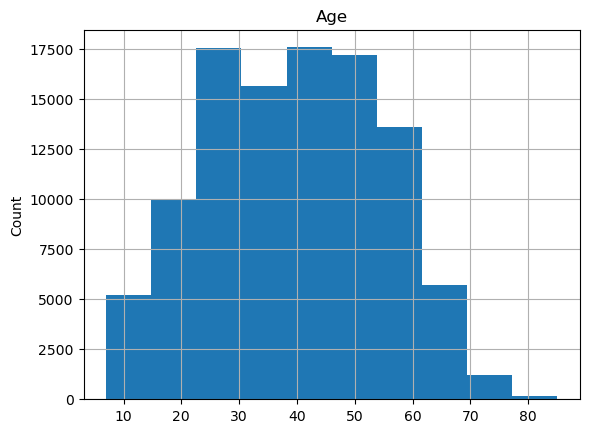

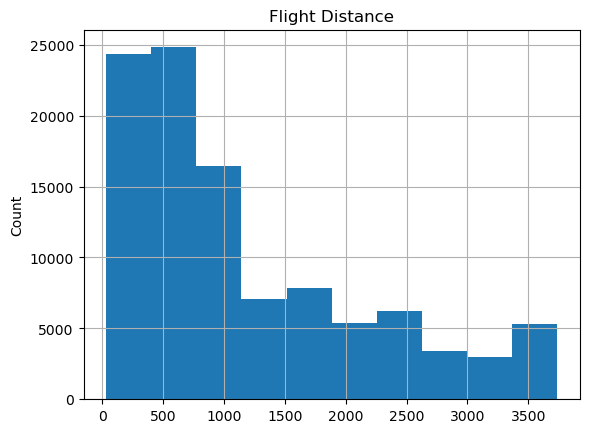

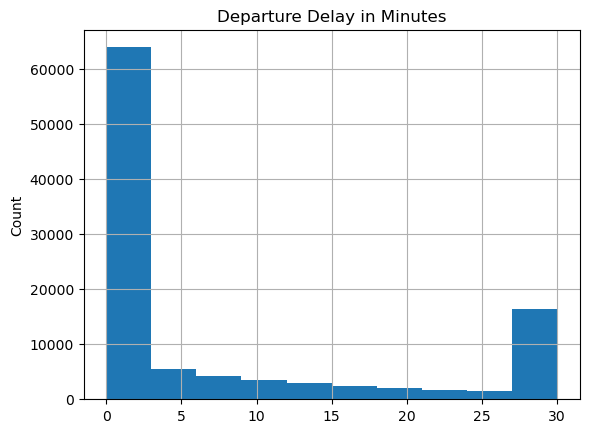

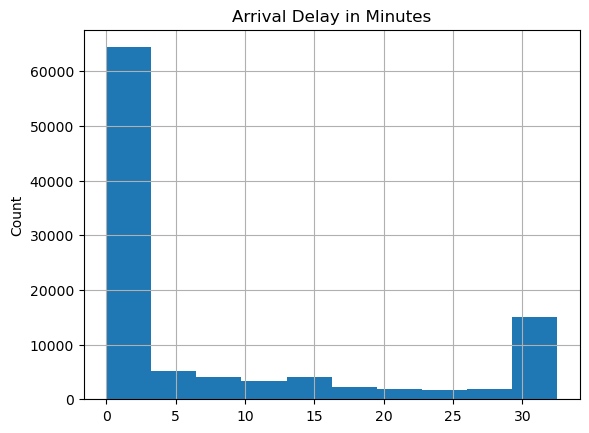

In [23]:
for col in num_cols:
    df[col].hist()
    plt.title(col)
    plt.ylabel("Count")
    plt.show()

## Outlier Analysis for Numerical Columns

In [24]:
num_cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

## Visualization of Outliers

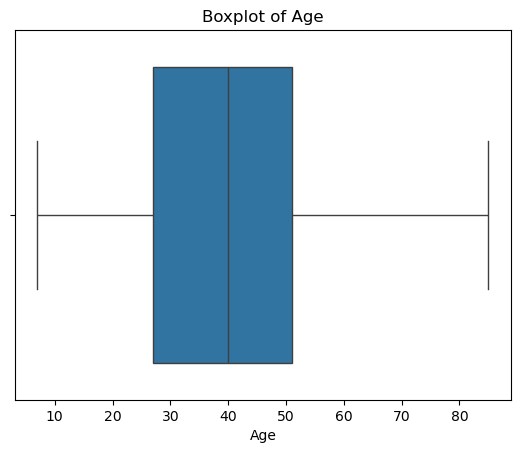

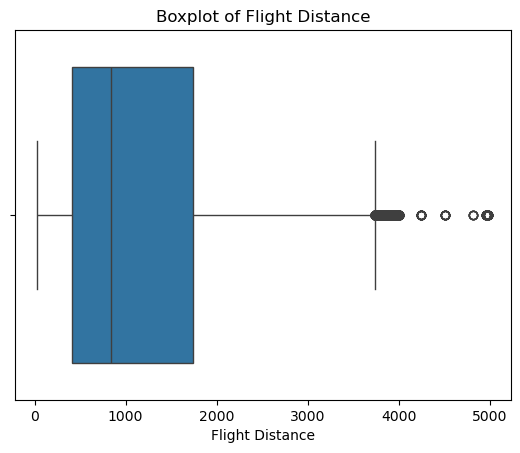

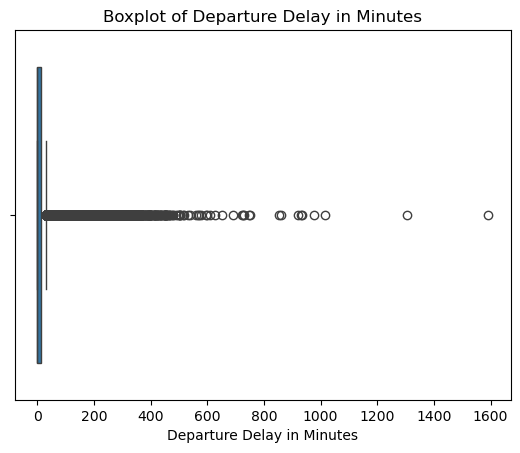

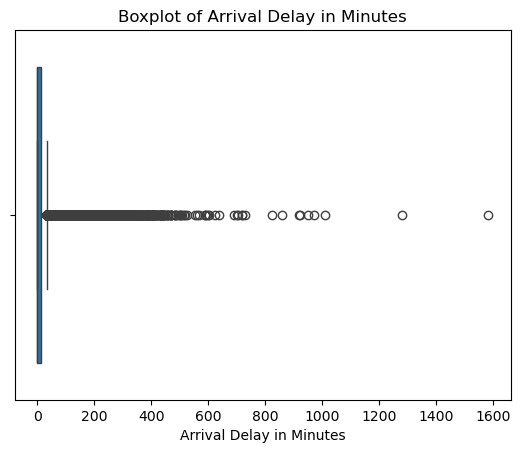

In [12]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# dots outside the whiskers represent the outliers 


* **Flight Distance:** The data is right-skewed. Most values are relatively low, but some flights have extremely high distances (e.g., over 3000 km), which appear as outliers.

* **Departure/Arrival Delay in Minutes**: These variables are also right-skewed. Most delays are close to zero, but there are many large delays marked as outliers (over 600–800 minutes).

* **Age**: The distribution is quite symmetric, and no strong outliers are present. The median is around 40, and values range from 7 to 85.

In [13]:
def outlier_threshold(dataframe,col_name,q1=0.25,q3=0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)

    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit,upper_limit

In [14]:
def check_outlier(dataframe,col_name):
    lower_limit,upper_limit =  outlier_threshold(dataframe,col_name)
    if dataframe[(dataframe[col_name] < lower_limit)| (dataframe[col_name] > upper_limit)].any(axis=None):
        return True
    else:
        return False

In [15]:
for col in num_cols:
    print(col,check_outlier(df,col))
    

Age False
Flight Distance True
Departure Delay in Minutes True
Arrival Delay in Minutes True


In [17]:
# Replaces outliers in a specific column with threshold values (low and high limits)
def replace_with_thresholds(dataframe,col_name):
    dataframe[col_name] = dataframe[col_name].astype(float)
    low_limit, up_limit = outlier_threshold(dataframe,col_name)
    dataframe.loc[(dataframe[col_name] < low_limit),col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit),col_name] = up_limit

In [19]:
for col in num_cols:
    replace_with_thresholds(df,col)

Age False
Flight Distance False
Departure Delay in Minutes False
Arrival Delay in Minutes False


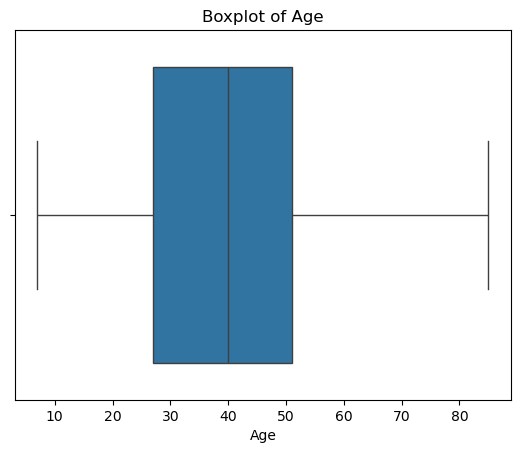

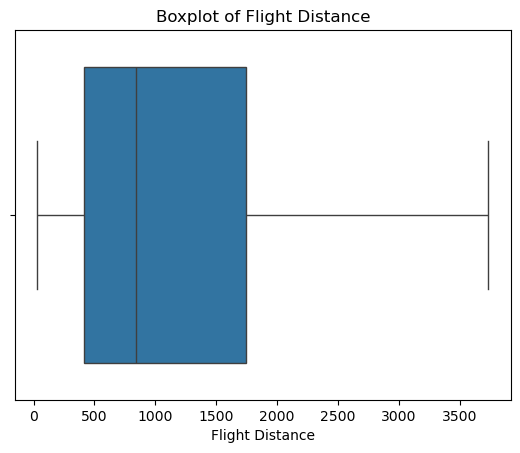

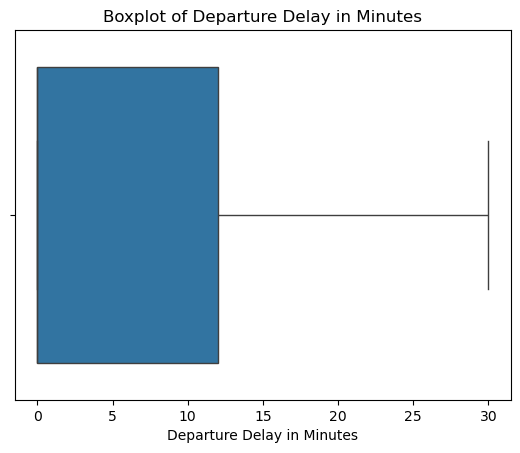

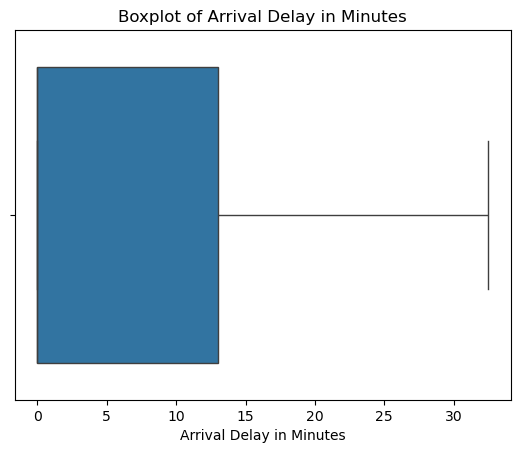

In [20]:
for col in num_cols:
    print(col,check_outlier(df,col))

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#As seen in the image, outliers are suppressed

## Analysis of Categorical Columns

        Gender      Ratio
Gender                   
Female   52727  50.745881
Male     51177  49.254119
##########################################


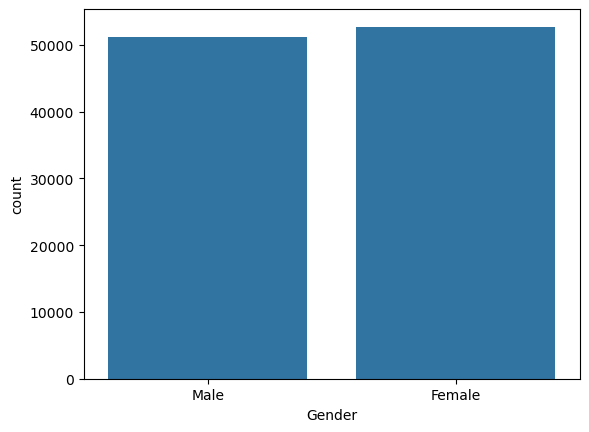

                   Customer Type      Ratio
Customer Type                              
Loyal Customer             84923  81.732176
disloyal Customer          18981  18.267824
##########################################


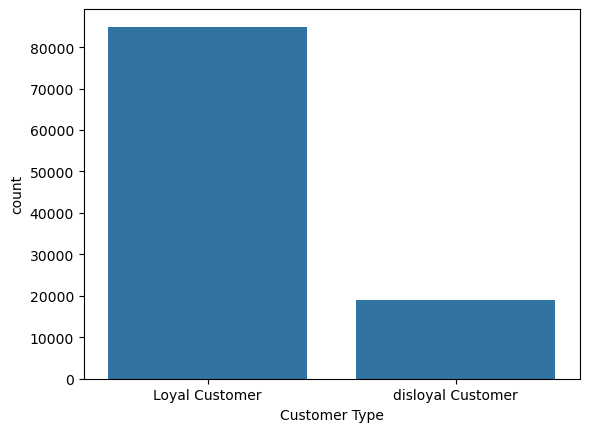

                 Type of Travel      Ratio
Type of Travel                            
Business travel           71655  68.962696
Personal Travel           32249  31.037304
##########################################


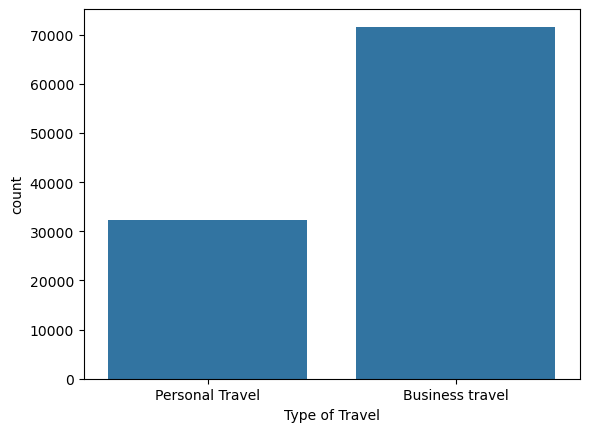

          Class      Ratio
Class                     
Business  49665  47.798930
Eco       46745  44.988643
Eco Plus   7494   7.212427
##########################################


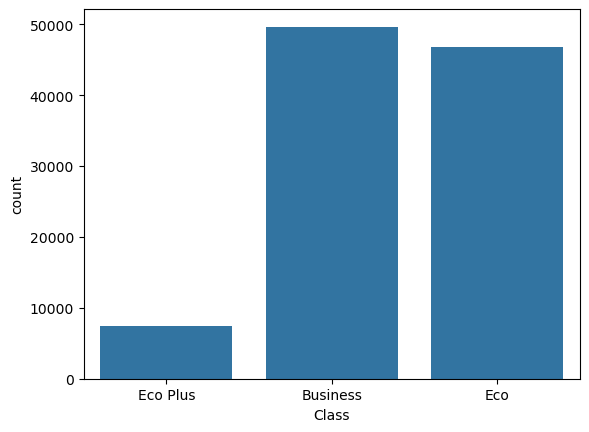

                         satisfaction      Ratio
satisfaction                                    
neutral or dissatisfied         58879  56.666731
satisfied                       45025  43.333269
##########################################


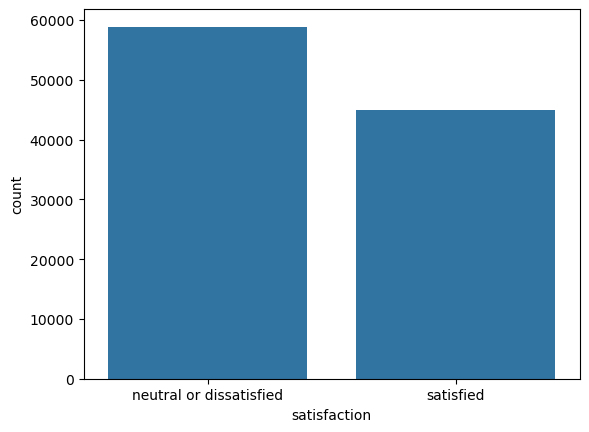

                       Inflight wifi service      Ratio
Inflight wifi service                                  
3                                      25868  24.896058
2                                      25830  24.859486
4                                      19794  19.050277
1                                      17840  17.169695
5                                      11469  11.038074
0                                       3103   2.986411
##########################################


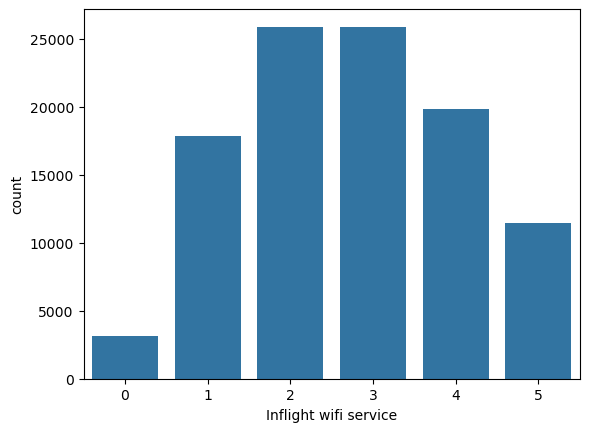

                                   Departure/Arrival time convenient  \
Departure/Arrival time convenient                                      
4                                                              25546   
5                                                              22403   
3                                                              17966   
2                                                              17191   
1                                                              15498   
0                                                               5300   

                                       Ratio  
Departure/Arrival time convenient             
4                                  24.586156  
5                                  21.561249  
3                                  17.290961  
2                                  16.545080  
1                                  14.915691  
0                                   5.100862  
##########################################


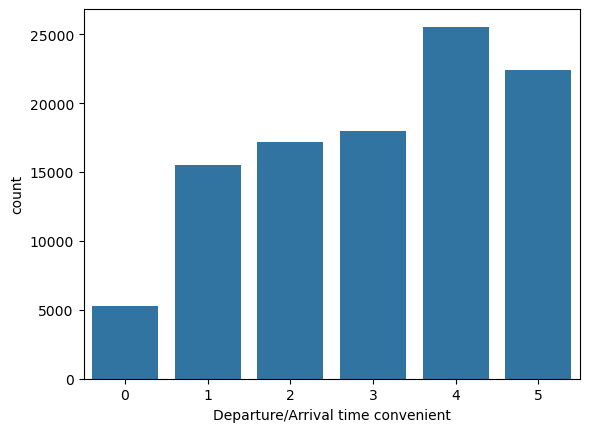

                        Ease of Online booking      Ratio
Ease of Online booking                                   
3                                        24449  23.530374
2                                        24021  23.118455
4                                        19571  18.835656
1                                        17525  16.866531
5                                        13851  13.330574
0                                         4487   4.318409
##########################################


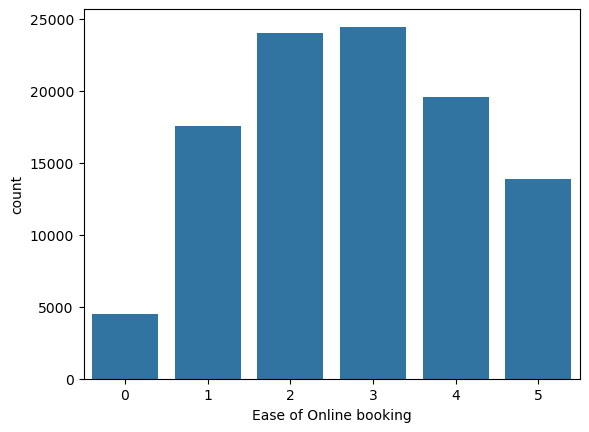

               Gate location      Ratio
Gate location                          
3                      28577  27.503272
4                      24426  23.508238
2                      19459  18.727864
1                      17562  16.902140
5                      13879  13.357522
0                          1   0.000962
##########################################


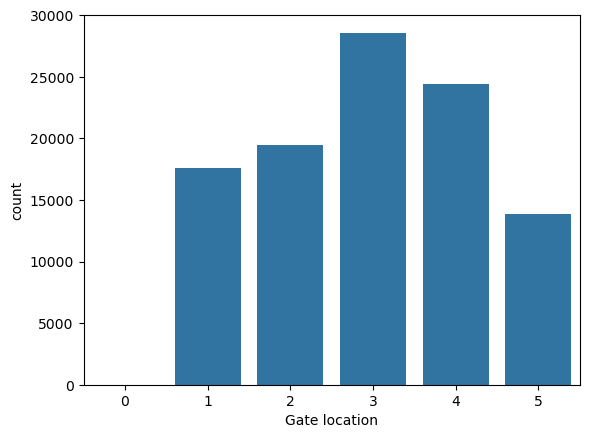

                Food and drink      Ratio
Food and drink                           
4                        24359  23.443756
5                        22313  21.474630
3                        22300  21.462119
2                        21988  21.161842
1                        12837  12.354674
0                          107   0.102980
##########################################


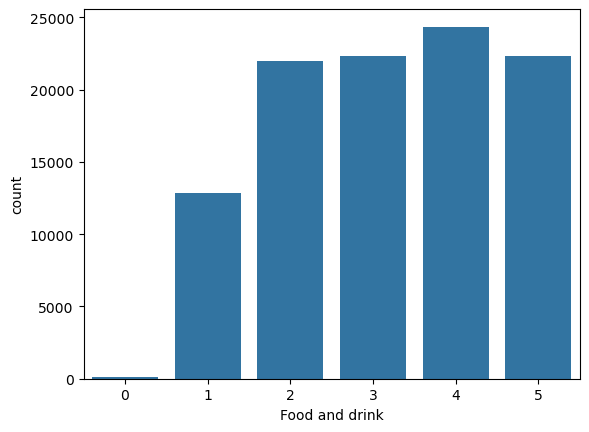

                 Online boarding      Ratio
Online boarding                            
4                          30762  29.606175
3                          21804  20.984755
5                          20713  19.934747
2                          17505  16.847282
1                          10692  10.290268
0                           2428   2.336772
##########################################


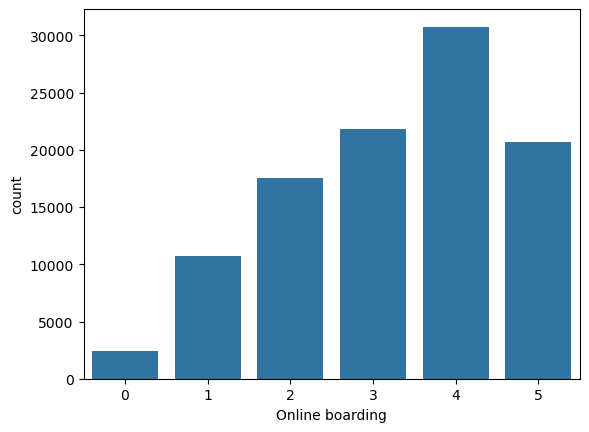

              Seat comfort      Ratio
Seat comfort                         
4                    31765  30.571489
5                    26470  25.475439
3                    18696  17.993532
2                    14897  14.337273
1                    12075  11.621304
0                        1   0.000962
##########################################


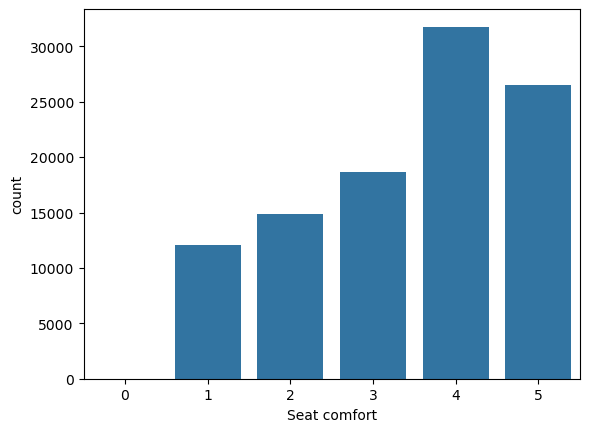

                        Inflight entertainment      Ratio
Inflight entertainment                                   
4                                        29423  28.317485
5                                        25213  24.265668
3                                        19139  18.419888
2                                        17637  16.974322
1                                        12478  12.009162
0                                           14   0.013474
##########################################


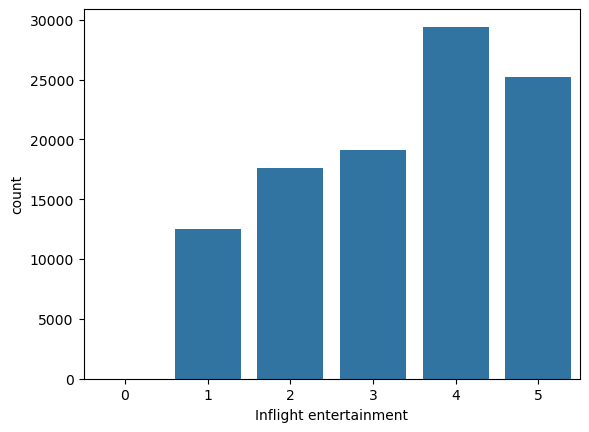

                  On-board service      Ratio
On-board service                             
4                            30867  29.707230
5                            23648  22.759470
3                            22833  21.975092
2                            14681  14.129389
1                            11872  11.425932
0                                3   0.002887
##########################################


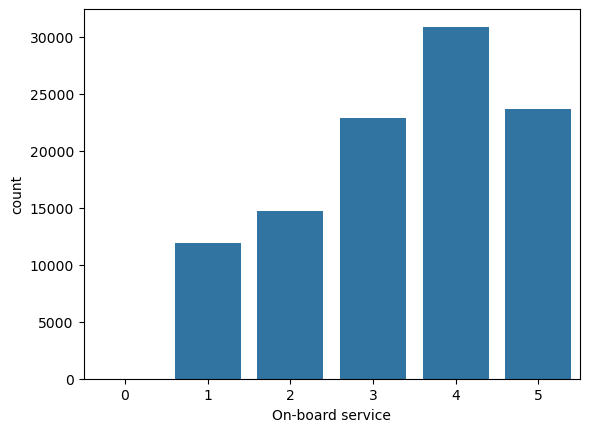

                  Leg room service      Ratio
Leg room service                             
4                            28789  27.707307
5                            24667  23.740183
3                            20098  19.342855
2                            19525  18.791384
1                            10353   9.964005
0                              472   0.454265
##########################################


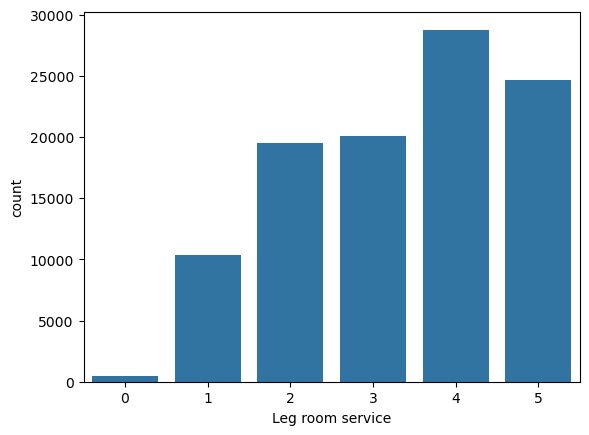

                  Baggage handling      Ratio
Baggage handling                             
4                            37383  35.978403
5                            27131  26.111603
3                            20632  19.856791
2                            11521  11.088120
1                             7237   6.965083
##########################################


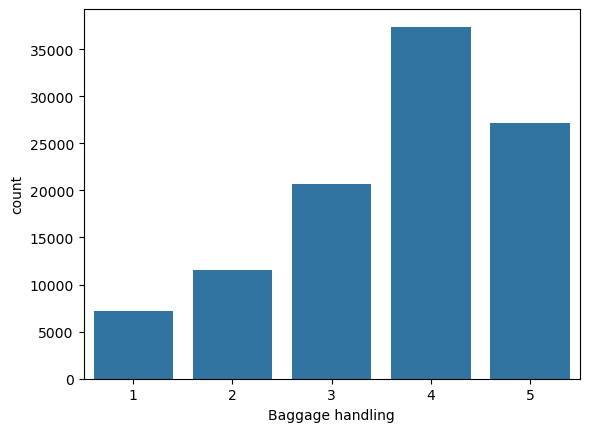

                 Checkin service      Ratio
Checkin service                            
4                          29055  27.963312
3                          28446  27.377194
5                          20619  19.844279
2                          12893  12.408569
1                          12890  12.405682
0                              1   0.000962
##########################################


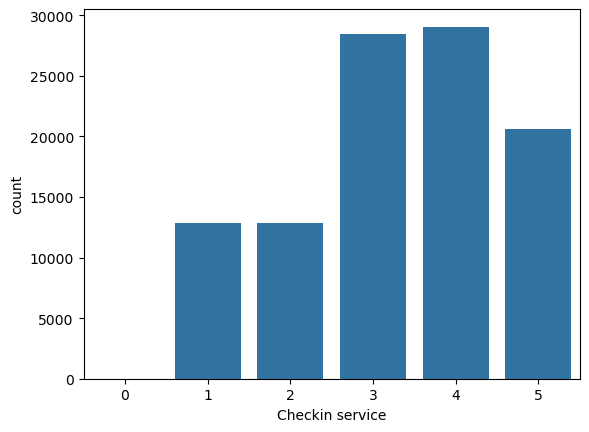

                  Inflight service      Ratio
Inflight service                             
4                            37945  36.519287
5                            27116  26.097167
3                            20299  19.536303
2                            11457  11.026524
1                             7084   6.817832
0                                3   0.002887
##########################################


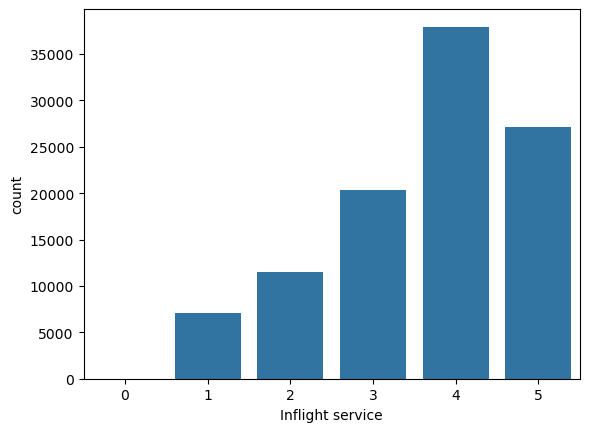

             Cleanliness      Ratio
Cleanliness                        
4                  27179  26.157800
3                  24574  23.650678
5                  22689  21.836503
2                  16132  15.525870
1                  13318  12.817601
0                     12   0.011549
##########################################


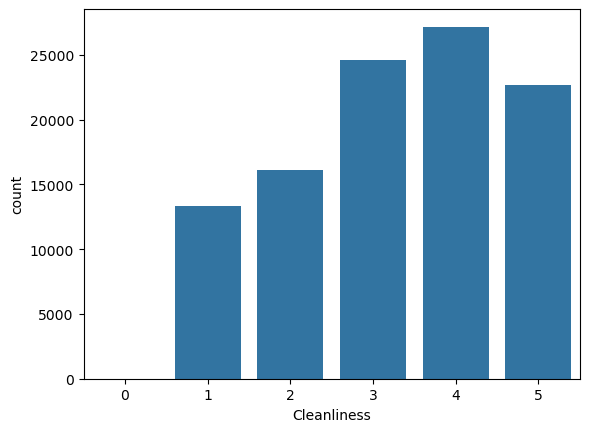

In [21]:

def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)